In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import Euclid

In [2]:
%erun PHZ_NNPZ 0.13.0

In [9]:
import nnpz.neighbor_selection.brute_force_methods as bfm
from nnpz.neighbor_selection.BruteForceSelector import BruteForceSelector
from nnpz.scaling import Chi2Scaling

In [43]:
results = dict()
xcoords = np.linspace(10, 1e3, 200)
ycoords = np.linspace(10, 1e3, 200)

xcenter = np.quantile(xcoords, 0.5)
ycenter = np.quantile(ycoords, 0.5)

xx, yy = np.meshgrid(xcoords, ycoords)
ref_coords = np.column_stack([xx.ravel(), yy.ravel()])
ref_errors = np.zeros(ref_coords.shape)
ref = np.stack([ref_coords, ref_errors], axis=-1)
    
center = np.array([xcenter, ycenter])
center_error = np.array([2, 2])
center = np.stack([center, center_error], axis=-1)

In [83]:
chi2_scaling = Chi2Scaling(lambda x: 0 * x + 1, batch_size=200)

In [84]:
selector = BruteForceSelector(bfm.Chi2Distance(), bfm.SmallestSelector(20), scaling_method=chi2_scaling)
selector._initializeImpl(ref)
nn, distances, scales = selector._findNeighborsImpl(center, None)

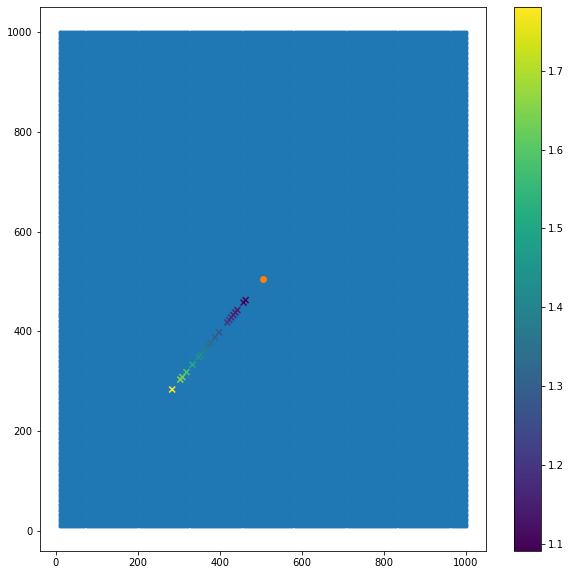

In [85]:
plt.figure(figsize=(10,10))
plt.scatter(ref[:,0,0], ref[:,1,0], marker='.')
plt.scatter(ref[nn,0, 0], ref[nn,1, 0], marker='x', c=scales)
plt.colorbar()
plt.scatter(center[0,0], center[1,0])
plt.show()